In [51]:
import sys, cv2
import numpy as np
sys.path.append("../utils")
from mujoco_parser import MuJoCoParserClass
from util import rpy2r,get_idxs

In [52]:
xml_path = '../asset/kimlab_dualarms/scene_dualarms.xml'
robot_env = MuJoCoParserClass(name='Dual Arms',rel_xml_path=xml_path,VERBOSE=False)
robot_env.set_geom_color(
    rgba                = (0.2,0.2,1.0,0.9),
    body_names_to_color = [
        'robot1/end_link','robot1/index_L1','robot1/index_L2','robot1/index_tip',
        'robot1/middle_L1','robot1/middle_L2','robot1/middle_tip',
        'robot1/ring_L1','robot1/ring_L2','robot1/ring_tip',
        'robot1/pinky_L1','robot1/pinky_L2','robot1/pinky_tip',
        'robot1/thumb_L1','robot1/thumb_L2','robot1/thumb_tip'],
)
robot_env.set_geom_color(
    rgba                = (1.0,0.2,0.2,0.9),
    body_names_to_color = [
        'robot2/end_link','robot2/index_L1','robot2/index_L2','robot2/index_tip',
        'robot2/middle_L1','robot2/middle_L2','robot2/middle_tip',
        'robot2/ring_L1','robot2/ring_L2','robot2/ring_tip',
        'robot2/pinky_L1','robot2/pinky_L2','robot2/pinky_tip',
        'robot2/thumb_L1','robot2/thumb_L2','robot2/thumb_tip'],
)

In [53]:
q_init = robot_env.data.qpos.copy()
q_init[18] = -np.pi/2
robot_env.forward(q=q_init)

robot_shoulder_pos = robot_env.get_p_joint('robot2/joint1')
robot_wrist_pos = robot_env.get_p_joint('robot2/joint6')

robot_arm_length = np.linalg.norm(robot_shoulder_pos-robot_wrist_pos)
print(robot_arm_length)

0.6779999999999998


In [54]:
ROBOT_RIGHT_ARM_JOINT_NAMES = ['robot2/joint1','robot2/joint2','robot2/joint3','robot2/joint4','robot2/joint5']#,'robot2/joint6']
ROBOT_RIGHT_ARM_IDXS = get_idxs(robot_env.joint_names,ROBOT_RIGHT_ARM_JOINT_NAMES)
ROBOT_RIGHT_ARM_JOINT_MAXS = robot_env.rev_joint_maxs[ROBOT_RIGHT_ARM_IDXS]
ROBOT_RIGHT_ARM_JOINT_MAXS[0] = 0
ROBOT_RIGHT_ARM_JOINT_MINS = robot_env.rev_joint_mins[ROBOT_RIGHT_ARM_IDXS]

ROBOT_RIGHT_ARM_JOINT_MAXS = np.floor(ROBOT_RIGHT_ARM_JOINT_MAXS)
ROBOT_RIGHT_ARM_JOINT_MINS = np.ceil(ROBOT_RIGHT_ARM_JOINT_MINS)

from itertools import product

dimensions = []
for min_val, max_val in zip(ROBOT_RIGHT_ARM_JOINT_MINS, ROBOT_RIGHT_ARM_JOINT_MAXS):
    dim_values = np.arange(min_val, max_val + np.pi/10, np.pi/10)
    dimensions.append(dim_values)

grid_points = np.array(list(product(*dimensions)))
print(grid_points.shape)

(137984, 5)


In [55]:
robot_env.reset() # reset

# Initialize MuJoCo viewer
robot_env.init_viewer(
    viewer_title='Dualarms',viewer_width=1200,viewer_height=800,
    viewer_hide_menus=True,
)
robot_env.update_viewer(
    azimuth=177,distance=1.42,elevation=-34,lookat=[0.25,-0.0,2.1],
    VIS_TRANSPARENT=True,
)
wrist_pos_list = []
possible_wrist_pos_list = []
robot_q_list = []

point_number = 0
wrist_target = np.eye(3)

# Reset and loop
robot_env.reset()
while robot_env.is_viewer_alive() and point_number < len(grid_points):
    q_random = grid_points[point_number]
    robot_env.forward(q=q_random,joint_idxs=ROBOT_RIGHT_ARM_IDXS,INCREASE_TICK=True) # FK
    wrist_pos = robot_env.get_p_joint('robot2/joint6')
    wrist_pos_list.append(wrist_pos)

    wrist_rot = robot_env.get_R_joint('robot2/joint6')
    rotation_diff,_ = cv2.Rodrigues(wrist_rot.dot(wrist_target.T))
    rotation_error = np.linalg.norm(rotation_diff)
    if rotation_error < np.pi/12:
        possible_wrist_pos_list.append(wrist_pos)
        robot_q_list.append(q_random)

    # Render
    # robot_env.plot_T(p=np.zeros(3),R=np.eye(3,3),
    #             PLOT_AXIS=True,axis_len=0.5,axis_width=0.005)
    # robot_env.plot_T(p=np.array([0,0,0.5]),R=np.eye(3),PLOT_AXIS=False,
    #             label='Tick:[%d]'%(point_number))
    # robot_env.plot_traj(wrist_pos_array,rgba=[0,1,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    # robot_env.render()

    point_number += 1
    if point_number % 1000 == 0: print('point_number:',point_number)
        
robot_env.close_viewer()

point_number: 1000
point_number: 2000
point_number: 3000
point_number: 4000
point_number: 5000
point_number: 6000
point_number: 7000
point_number: 8000
point_number: 9000
point_number: 10000
point_number: 11000
point_number: 12000
point_number: 13000
point_number: 14000
point_number: 15000
point_number: 16000
point_number: 17000
point_number: 18000
point_number: 19000
point_number: 20000
point_number: 21000
point_number: 22000
point_number: 23000
point_number: 24000
point_number: 25000
point_number: 26000
point_number: 27000
point_number: 28000
point_number: 29000
point_number: 30000
point_number: 31000
point_number: 32000
point_number: 33000
point_number: 34000
point_number: 35000
point_number: 36000
point_number: 37000
point_number: 38000
point_number: 39000
point_number: 40000
point_number: 41000
point_number: 42000
point_number: 43000
point_number: 44000
point_number: 45000
point_number: 46000
point_number: 47000
point_number: 48000
point_number: 49000
point_number: 50000
point_num

In [56]:
wrist_pos_array = np.array(wrist_pos_list)
possible_wrist_pos_array = np.array(possible_wrist_pos_list)

robot_env.reset() # reset

# Initialize MuJoCo viewer
robot_env.init_viewer(
    viewer_title='Dualarms',viewer_width=1200,viewer_height=800,
    viewer_hide_menus=True,
)
robot_env.update_viewer(
    azimuth=177,distance=1.42,elevation=-34,lookat=[0.25,-0.0,2.1],
    VIS_TRANSPARENT=True,
)

while robot_env.is_viewer_alive():
    # robot_env.plot_traj(wrist_pos_array[::3],rgba=[0,1,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    robot_env.plot_traj(possible_wrist_pos_array,rgba=[1,0,0,1],plot_line=False,plot_sphere=True,sphere_r=0.01)
    robot_env.forward(q=robot_q_list[50],joint_idxs=ROBOT_RIGHT_ARM_IDXS)
    robot_env.render()

robot_env.close_viewer()

Pressed ESC
Quitting.


In [57]:
xml_path = '../asset/smplh_rig/scene_smplh_rig.xml'
smplh_env = MuJoCoParserClass(name='Common-Rig',rel_xml_path=xml_path,VERBOSE=False)
# Modify the color of body exluding 'world'
for body_name in smplh_env.body_names:
    if body_name in ['world']: continue
    for geom_idx in smplh_env.get_geom_idxs_from_body_name(body_name=body_name):
        smplh_env.model.geom(geom_idx).rgba = [0.3,0.3,0.5,1]
print ("Done.")

Done.


In [58]:
smplh_shoulder_pos = smplh_env.get_p_joint('r_shoulder1')
smplh_wrist_pos = smplh_env.get_p_joint('r_wrist1')

smplh_arm_length = np.linalg.norm(smplh_shoulder_pos-smplh_wrist_pos)
print(smplh_arm_length)

0.5298907664924913


In [59]:
SMPLH_RIGHT_ARM_JOINT_NAMES = ['r_shoulder1','r_shoulder2','r_shoulder3','r_elbow','r_wrist1','r_wrist2','r_wrist3']
SMPLH_RIGHT_ARM_IDXS = get_idxs(smplh_env.joint_names,SMPLH_RIGHT_ARM_JOINT_NAMES)
SMPLH_RIGHT_ARM_JOINT_MAXS = smplh_env.rev_joint_maxs[SMPLH_RIGHT_ARM_IDXS]
SMPLH_RIGHT_ARM_JOINT_MINS = smplh_env.rev_joint_mins[SMPLH_RIGHT_ARM_IDXS]
SMPLH_RIGHT_ARM_IDXS = [i+6 for i in SMPLH_RIGHT_ARM_IDXS]

SMPLH_RIGHT_ARM_JOINT_MAXS = np.floor(SMPLH_RIGHT_ARM_JOINT_MAXS)
SMPLH_RIGHT_ARM_JOINT_MINS = np.ceil(SMPLH_RIGHT_ARM_JOINT_MINS)

from itertools import product

dimensions = []
for min_val, max_val in zip(SMPLH_RIGHT_ARM_JOINT_MINS, SMPLH_RIGHT_ARM_JOINT_MAXS):
    dim_values = np.arange(min_val, max_val + np.pi/5, np.pi/5)
    dimensions.append(dim_values)

grid_points = np.array(list(product(*dimensions)))
print(grid_points.shape)

(483153, 7)


In [60]:
smplh_env.reset() # reset

# Initialize MuJoCo viewer
smplh_env.init_viewer(
    viewer_title='SMPL-H',viewer_width=1200,viewer_height=800,
    viewer_hide_menus=True,
)
smplh_env.update_viewer(
    azimuth=177,distance=1.42,elevation=-34,lookat=[0.25,-0.0,2.1],
    VIS_TRANSPARENT=True,
)
smplh_wrist_pos_list = []
smplh_possible_wrist_pos_list = []
smplh_q_list = []

point_number = 0
smplh_wrist_target = np.array([[0,-1,0],[1,0,0],[0,0,1]])

# Reset and loop
smplh_env.reset()
while smplh_env.is_viewer_alive() and point_number < len(grid_points):
    q_random = grid_points[point_number]
    smplh_env.forward(q=q_random,joint_idxs=SMPLH_RIGHT_ARM_IDXS,INCREASE_TICK=True) # FK
    smplh_wrist_pos = smplh_env.get_p_body('right_wrist')
    smplh_wrist_pos_list.append(smplh_wrist_pos)
    # q_init = np.zeros(robot_env.model.nq)
    # robot_env.forward(q=q_init)
    
    smplh_wrist_rot = smplh_env.get_R_body('right_wrist')
    rotation_diff,_ = cv2.Rodrigues(smplh_wrist_rot.dot(smplh_wrist_target.T))
    rotation_error = np.linalg.norm(rotation_diff)

    # Render
    smplh_env.plot_T(p=np.zeros(3),R=np.eye(3,3),
                PLOT_AXIS=True,axis_len=0.5,axis_width=0.005)
    smplh_env.plot_T(p=np.array([0,0,0.5]),R=np.eye(3),PLOT_AXIS=False,
                label='Tick:[%d]'%(smplh_env.tick))
    # smplh_env.plot_traj(smplh_wrist_pos_array,rgba=[1,0,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    # smplh_env.render()

    point_number += 1
    if point_number % 1000 == 0: print('point_number:',point_number)
        
smplh_env.close_viewer()

point_number: 1000
point_number: 2000
point_number: 3000
point_number: 4000
point_number: 5000
point_number: 6000
point_number: 7000
point_number: 8000
point_number: 9000
point_number: 10000
point_number: 11000
point_number: 12000
point_number: 13000
point_number: 14000
point_number: 15000
point_number: 16000
point_number: 17000
point_number: 18000
point_number: 19000
point_number: 20000
point_number: 21000
point_number: 22000
point_number: 23000
point_number: 24000
point_number: 25000
point_number: 26000
point_number: 27000
point_number: 28000
point_number: 29000
point_number: 30000
point_number: 31000
point_number: 32000
point_number: 33000
point_number: 34000
point_number: 35000
point_number: 36000
point_number: 37000
point_number: 38000
point_number: 39000
point_number: 40000
point_number: 41000
point_number: 42000
point_number: 43000
point_number: 44000
point_number: 45000
point_number: 46000
point_number: 47000
point_number: 48000
point_number: 49000
point_number: 50000
point_num

Pressed ESC
Quitting.

Robot: Red, SMPL-H: Green


""

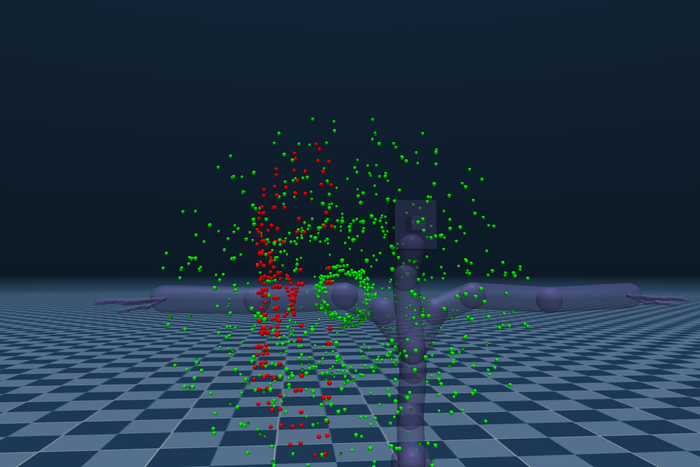

In [61]:
robot_wrist_pos_array = (possible_wrist_pos_array - robot_shoulder_pos) * smplh_arm_length / robot_arm_length + smplh_shoulder_pos
smplh_wrist_pos_array = np.array(smplh_wrist_pos_list)

smplh_env.reset() # reset

# Initialize MuJoCo viewer
smplh_env.init_viewer(
    viewer_title='SMPLH',viewer_width=1200,viewer_height=800,
    viewer_hide_menus=True,
)
smplh_env.update_viewer(
    azimuth=177,distance=1.42,elevation=-34,lookat=[0.23,-0.2,1.6],
    VIS_TRANSPARENT=True,
)

while smplh_env.is_viewer_alive():
    smplh_env.plot_traj(smplh_wrist_pos_array[::500],rgba=[0,1,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    smplh_env.plot_traj(robot_wrist_pos_array,rgba=[1,0,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    image = smplh_env.grab_image()
    smplh_env.render()

smplh_env.close_viewer()

import mediapy
print("\nRobot: Red, SMPL-H: Green")
mediapy.show_image(image,width=700)